In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure as fig
from IPython.display import Image

## Funktionen

In [2]:
#Lagerlebensdauer

def lebensdauer(Cr, Cor, fo, n1, FA, FAy, FAz):
    
    #Resultierende Radiallast[N]
    FR = math.sqrt((FAy)**2 + (FAz)**2)
    print(f'Die resultierende Radiallast ist: {FR:4.4f} N')
    
    #Axiallast[N]
    print("Die resultierende Axiallast ist:",FA,"N")
    
    #Berechnungsfaktoren X, Y für Rillenkugellager für den Faktor CN 
    
    d = {'Q': [0.3, 0.5, 0.9, 1.6, 3, 6], "e": [0.22, 0.24, 0.28, 0.32, 0.36, 0.43], '[X] fo*FA/Cor <= e': [1, 1, 1, 1, 1,1],
              '[Y] fo*FA/Cor <= e': [0, 0, 0, 0, 0,0], '[X] fo*FA/Cor > e': [0.56, 0.56, 0.56, 0.56, 0.56,0.56], '[Y] fo*FA/Cor > e': 
               [2, 1.8, 1.58, 1.4, 1.2,1] }
    
    df = pd.DataFrame(data=d)
    
    #Berechnung vom Faktor FA/FR
    faktor_FA_FR= FA/FR
    print(f'Der Faktor FA/FR ist {faktor_FA_FR:4.4f}')

    #Berechnung des Quotienten [Q]
    Q = (fo*FA)/Cor
    
    print(f" fo*FA/Cro = {Q}")
    
    #Interpolation und Auswahl von e(Q)
    faktoren_Q = df["Q"].to_numpy()
    faktoren_e = df["e"].to_numpy()
    faktoren_y = df["[Y] fo*FA/Cor > e"].to_numpy()
    # print(faktoren_Q)
    
    e=0
    y=0
    
    for i in range(len(faktoren_Q)):
        if faktoren_Q[i] == Q:
            e=Q
            y=faktoren_y[i]
            break
        elif faktoren_Q[i]< Q and Q < faktoren_Q[i+1]:
            e=((faktoren_e[i+1]-faktoren_e[i])/(faktoren_Q[i+1]-faktoren_Q[i]))*(Q-faktoren_Q[i])+faktoren_e[i]
            y=((faktoren_y[i+1]-faktoren_y[i])/(faktoren_Q[i+1]-faktoren_Q[i]))*(Q-faktoren_Q[i])+faktoren_y[i]
        
    
    print(f'Der Wert von e (interpoliert) ist: {e:4.4f}')
    print(f'Der Wert von y (interpoliert) ist: {y:4.4f}')
    
    #Fallunterscheidung für die Berechnung von P
    x= 0.56 #Konstant
    
    if faktor_FA_FR > e:
        #Überprüfung mit den Nachkommastellen
        y=float('%.3f' % (y))
        FR=float('%.3f' % (FR))
        FA=float('%.3f' % (FA))
        
        #Lagerbelastung
        P= x*FR + y*FA
        print("P= x*FR + y*FA")
        print(f'Der Wert der äquivalenten Lagerbelastung ist: {P:4.4f} N')
    else:
        #Lagerbelastung
        print("P=FR")
        P=FR
        print(f'Der Wert der äquivalenten Lagerbelastung ist: {P:4.4f} N')
    
    #Nominelle Lagerlebensdauer in Stunden 
        
    L10h= (10**6/(60*n1))*((Cr/P)**3)
    print(f'\nDer nominelle Lagerlebensdauer in Stunden ist:{L10h:4.4f}h')
    
    #Nominelle Lagerlebensdauer in Umdrehungen
    L10=(Cr/P)**3
    print(f'Der nominelle Lagerlebensdauer in Umdrehungen ist: {L10:4.4f} * 10^6 Umdrehungen')
    
    #Erweiterte Lagerlebensdauer
    #DIN 281
    a_iso=1
    a1=0.25
    #Drehzahlen
    n2= 350 #(1/min... muss unabhängig sein)
    
    #mittlere Drehzahl
    n_aquivalent=0.6*n1+0.4*n2 #Zeitanteile berücksichtigen 
    print(f'\nn_äquivalent: {n_aquivalent:4.4f} 1/min')
    
    #Äquivalente Lagerbelastung
    p=3 #Faktor für Rillenkugellager
    p_aquivalent=(((P**p)*n1*0.6)/n_aquivalent)**(1/p)
    print(f'p_äquivalent: {p_aquivalent:4.4f} N')
    
    #Nominelle Lagerlebensdauer 
    L10hm= (10**6/(60*n_aquivalent))*((Cr/p_aquivalent)**3)
    
    #Erweiterte Lagerlebensdauer
    L1mh=a_iso*a1*L10hm
    
    
    print(f'Die modifizierte Lagerlebensdauer ist: {L1mh:4.4f} Stunden')

## Radgetriebe

In [45]:
z_liste=[23,47,23,47]
d_liste=[]
da_liste=[]
df_liste=[]
mn=0.004
beta=(12*math.pi)/180
alpha_n=(20*math.pi)/180

for i in range(len(z_liste)):
    #Teilkreisdurchmesser 
    d=(z_liste[i]*mn)/math.cos(beta)
    d_liste.append(d)
    
    #Kopfkreisdurchmesser
    da1=d+2*mn
    da_liste.append(da1)
    
    #Fußkreisdurchmesser 
    df= d-2.5*mn
    df_liste.append(df)


d=np.array(d_liste)
da=np.array(da_liste)
df=np.array(df_liste)
    
print("Teilkreisdurchmesser [m]:")
print(d)

print("\nKopfkreisdurchmesser [m]")
print(da)

print("\nFußkreisdurchmesser [m]")
print(df)

d1=d_liste[0]
d3=d1
d2=d_liste[1]
d4=d2



Teilkreisdurchmesser [m]:
[0.09405533 0.19220003 0.09405533 0.19220003]

Kopfkreisdurchmesser [m]
[0.10205533 0.20020003 0.10205533 0.20020003]

Fußkreisdurchmesser [m]
[0.08405533 0.18220003 0.08405533 0.18220003]


## Zahnkräfte

In [46]:
#Daten
#Antriebsmoment
Pan=20000
#Antriebsdrehzahl Gang 1
nan1=1460
#Abtriebsdrehzahl Gang 1
nab1=350

#Übersetzungen
iges=nan1/nab1
i_12=math.sqrt(iges)

#Momente und Übersetzungen
T1=Pan/(2*math.pi*(nan1/60))
M_an=T1
T2=i_12*T1
T3=T2
T4=T3*i_12

T_liste=[T1,T2,T3,T4]
print(T_liste)
Ft_liste=[]
Fa_liste=[]
Fr_liste=[]

for j in range(len(T_liste)):
    
    #Tangentialkraft
    Ft=2*T_liste[j]/d_liste[j]
    Ft_liste.append(Ft)
    
    #Axialkraft
    Fa=Ft*math.tan(beta)
    Fa_liste.append(Fa)
    
    #Radialkraft
    Fr=(Ft*math.tan(alpha_n))/math.cos(beta)
    Fr_liste.append(Fr)

    
for i in range(len(T_liste)):
    print(f"Zahnradkräfte {i+1}[N]:")
    print(f"Ft{i+1}= {Ft_liste[i]} N")
    print(f"Fa{i+1}= {Fa_liste[i]} N")
    print(f"Fr{i+1}= {Fr_liste[i]} N\n")
    
Ft1=Ft_liste[0]
Ft2=Ft1

Fa1=Fa_liste[0]
Fa2=Fa1

Fr1=Fr_liste[0]
Fr2=Fr1

Ft3=Ft_liste[2]
Ft4=Ft3

Fa3=Fa_liste[2]
Fa4=Fa3

Fr3=Fr_liste[2]
Fr4=Fr3


# print(Ft1,Fa1,Fr1,Ft3,Fa3,Fr3)

[130.81228199333864, 267.17199145144014, 267.17199145144014, 545.6740906007842]
Zahnradkräfte 1[N]:
Ft1= 2781.602603876048 N
Fa1= 591.2478854122733 N
Fr1= 1035.038628739391 N

Zahnradkräfte 2[N]:
Ft2= 2780.1451321436066 N
Fa2= 590.9380902320943 N
Fr2= 1034.496301254771 N

Zahnradkräfte 3[N]:
Ft3= 5681.166139597804 N
Fa3= 1207.569140909062 N
Fr3= 2113.9707025640973 N

Zahnradkräfte 4[N]:
Ft4= 5678.189388337855 N
Fa4= 1206.9364128963005 N
Fr4= 2112.8630488187696 N



## Überschlägige Durchmesser

In [47]:
# Nenn-Umfangskraft
print("Torsionsmomente [Nmm]")
print(T_liste)

#Statische Torsionsmomente
Tn_liste=[]
for u in range(len(Ft_liste)):
    T=(d_liste[u]/2)*Ft_liste[u]*0.7
    Tn_liste.append(T)

print("\nStatische Torsionsmomente für jedes Zahnrad [N]")
print(Tn_liste)

# An- Abtriebsmomente
Pab= 20e3
nab=350
Tan=130.81*0.7
Tab=Pab/(2*math.pi*(nab/60))*0.7
print("\n An- und Abtriebsmomente [Nm]")
print(Tan,Tab)

#Zulässige Schubspannung
delta_w=350
t_zul=delta_w/6
# Welle 1 
du1=1.72*((Tn_liste[0]*1000/t_zul)**(1/3))
du2=1.72*((Tn_liste[1]*1000/t_zul)**(1/3))
du3=1.72*((Tn_liste[3]*1000/t_zul)**(1/3))

print('\nÜberschlägige Durchmesser')
print(f' Welle 1: {du1} mm')
print(f' Welle 2: {du2} mm')
print(f' Welle 3: {du3} mm')


Torsionsmomente [Nmm]
[130.81228199333864, 267.17199145144014, 267.17199145144014, 545.6740906007842]

Statische Torsionsmomente für jedes Zahnrad [N]
[91.56859739533705, 187.02039401600808, 187.02039401600808, 381.9718634205489]

 An- und Abtriebsmomente [Nm]
91.567 381.97186342054874

Überschlägige Durchmesser
 Welle 1: 19.989642917645813 mm
 Welle 2: 25.362136647289706 mm
 Welle 3: 32.17856256691701 mm


In [48]:
#Längenangaben (mm)

lan1=85
lan2=105
lzw1=47.5
lzw2=122.1
lzw3=166.7
lab1=69.85
lab2=130.85

### Berechnung der Lagekräfte

In [ ]:
### Mit Hilfe der linearen Algebra kann das Gleichungssystem wie folgt geschrieben werden: A*X = B, 

#A steht für die Faktoren
#X steht für alle Lagerkräfte
#B steht für die Lösungen

A=np.array([[1,0,1,0,0,0,0,0,0,-1,0,0,0,0],
            [0,1,0,1,0,0,0,0,0,0,-1,0,0,0],
            [0,0,0,lan1/1000,0,0,0,0,0,0,-lan2/1000,0,0,0],
            [0,0,-lan1/1000,0,0,0,0,0,0,lan2/1000,0,0,0,0],
            [0,0,0,0,1,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,1,0,1,0,0,0,0,0,0],
            [0,0,0,0,0,0,1,0,1,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,lzw3/1000,0,0,0,0,0],
            [0,0,0,0,0,0,0,-lzw3/1000,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,1,0,0],
            [0,0,0,0,0,0,0,0,0,1,0,0,1,0],
            [0,0,0,0,0,0,0,0,0,0,1,0,0,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,lab2/1000],
            [0,0,0,0,0,0,0,0,0,0,0,0,-lab2/1000,0]])

B=np.array([-Fr1,
            -Ft1,
            -Ft1*lan2/1000,
            Fr1*lan2/1000-Fa1*(d1/2),
            Fa3-Fa2,
            Fr2+Fr3,
            Ft2-Ft3,
            Ft2*lzw1/1000-Ft3*lzw2/1000,
            -Fr2*lzw1/1000-Fa2*(d2/2)-Fr3*lzw2/1000-Fa3*(d3/2),
            -Fa4,
            -Fr4,
            Ft4,
            Ft4*lab1/1000,
            Fr4*lab1/1000+(d4/2)*Fa4])


X=np.linalg.solve(A,B)
Ay = X[0]
Az = X[1] 
By = X[2]
Bz = X[3]
Cx = X[4]
Cy = X[5]
Cz = X[6]
Dy = X[7]
Dz = X[8]
Ey = X[9]
Ez = X[10]
Fx = X[11]
Fy = X[12]
Fz = X[13]

LR={"Ay":Ay, "Az":Az, "By":By,"Bz":Bz, "Cx":Cx, "Cy":Cy, "Cz":Cz,
    "Dy":Dy, "Dz":Dz, "Ey":Ey, "Ez":Ez, "Fx":Fx,"Fy":Fy, "Fz":Fz}
LR_keys=list(LR.keys())
LR_values=list(LR.values())

for i in range(len(LR)):
    print(f'{LR_keys[i]}: {LR_values[i]} N')

Ay: -60.37387554477709 N
Az: 31.32741343112224 N
By: -1073.2875976255914 N
Bz: -164.4689205133904 N
Cx: 616.3212554967888 N
Cy: 624.1848038599073 N
Cz: 469.0283176722428 N
Dy: 2524.8245274435812 N
Dz: -3368.5918533939994 N
Ey: -98.62284443097747 N
Ez: 2648.4610967937797 N
Fx: -1207.569140909062 N
Fy: -2015.3478581331199 N
Fz: 3032.7050428040247 N


#### Resultierende Axialkräfte 

In [50]:
#Radialkräfte der Lager [N]
Fra=math.sqrt(By**2+Bz**2)
Frb=math.sqrt(Ay**2+Az**2)
Ka=Fa1
Ya=0.57
Yb=Ya

print(f'Ka: {Fa1} N')

# #Belastungsverhältnisse

# print(f'\nFra: {Fra} N')
# print(f'\nFrb: {Frb} N')
# print(f'\nFra/Ya: {Fra/Ya} N')
# print(f'\nFrb/Yb: {Frb/Yb} N')
# print(0.5*(Fra/Ya-Frb/Yb))

if Fra/Ya <= Frb/Yb and Ka >= 0:
    Bx=Ka + 0.5*Frb/Yb
    Ax=0.5*Frb/Yb
    print('\n1.Fall')
elif Fra/Ya > Frb/Yb and Ka > 0.5*(Fra/Ya-Frb/Yb):
    Bx=Ka + 0.5*Frb/Yb
    Ax=0.5*Frb/Yb
    print('\n2. Fall')
elif Fra/Ya > Frb/Yb and Ka <= 0.5*(Fra/Ya-Frb/Yb):
    Bx=0.5*Fra/Ya
    Ax=0.5*Fra/Ya-Ka
    print('\n3. Fall')
    
print('\nResultierende Axialkräfte')
print(f'\nLager Bx: {Bx} N')
print(f'Lager Ax: {Ax} N')
print(Bx-Ax-Ka)

Ka: 591.2478854122733 N

3. Fall

Resultierende Axialkräfte

Lager Bx: 952.4701379438555 N
Lager Ax: 361.2222525315823 N
0.0


## Lagerlebensdauer 

In [51]:
#Lagerlebensdauer für O-lagerung
def o_lager(FA, FR,Cr,e=1.14):
    #Berechnung vom Faktor FA/FR
    faktor_FA_FR= FA/FR
    print(f'\nDer Faktor FA/FR ist {faktor_FA_FR:4.4f}')
    print(f'Der Faktor FA ist {FA:4.4f}')
    print(f'Der Faktor FR ist {FR:4.4f}')
    
    #Fallunterscheidung für die Berechnung von P
    if faktor_FA_FR > e:
        #Überprüfung mit den Nachkommastellen
        x=0.35
        y=0.57
        
        #Lagerbelastung
        Pr= x*FR + y*FA
        print(f'Der Wert der äquivalenten Lagerbelastung der O-Lagerung ist: {Pr:4.4f} N')
        
    else:
        #Lagerbelastung
        Pr=FR
        print(f'Der Wert der äquivalenten Lagerbelastung der O-Lagerung ist: {Pr:4.4f} N')
        
    
   #Erweiterte Lagerlebensdauer
   
    #DIN 281
    a_iso=1
    a1=0.25
    #Drehzahlen
    n1=1460 #(1/min)
    n2= 0 #(1/min... muss unabhängig sein)
    
    #mittlere Drehzahl
    n_aquivalent=0.6*n1+0.4*n2 #Zeitanteile berücksichtigen 
    print(f'\nn_äquivalent: {n_aquivalent} 1/min')
    
    #Äquivalente Lagerbelastung
    p=3 #Faktor für Rillenkugellager
    p_aquivalent=(((Pr**p)*n1*0.6)/n_aquivalent)**(1/p)
    print(f'p_äquivalent: {p_aquivalent:4.4f} N')
    
    L10=(Cr/p_aquivalent)**3
    
    #Nominelle Lagerlebensdauer 
    L10hm= ((10e6/60)/n_aquivalent)*L10
    
    print(f'Die nominelle Lagerlebensdauer ist: {L10hm} Stunden')
    
    #Erweiterte Lagerlebensdauer
    L1mh=a_iso*a1*L10hm
    
    
    print(f'Die modifizierte Lagerlebensdauer ist: {L1mh:4.4f} Stunden')

In [52]:
#FAG 7007-B-XL-TVP
o_lager(Ax,math.sqrt(Ay**2+Az**2),24300)


Der Faktor FA/FR ist 5.3107
Der Faktor FA ist 361.2223
Der Faktor FR ist 68.0177
Der Wert der äquivalenten Lagerbelastung der O-Lagerung ist: 229.7029 N

n_äquivalent: 876.0 1/min
p_äquivalent: 229.7029 N
Die nominelle Lagerlebensdauer ist: 225249631.0358034 Stunden
Die modifizierte Lagerlebensdauer ist: 56312407.7590 Stunden


In [53]:
# FAG 7008-B-XL-TVP
o_lager(Bx,Fra,28000)


Der Faktor FA/FR ist 0.8772
Der Faktor FA ist 952.4701
Der Faktor FR ist 1085.8160
Der Wert der äquivalenten Lagerbelastung der O-Lagerung ist: 1085.8160 N

n_äquivalent: 876.0 1/min
p_äquivalent: 1085.8160 N
Die nominelle Lagerlebensdauer ist: 3262496.677574482 Stunden
Die modifizierte Lagerlebensdauer ist: 815624.1694 Stunden


In [54]:
#Festlager 2. Welle: 6306
lebensdauer(29600, 16000, 13.1,714.88 , Cx, Cy, Cz)

Die resultierende Radiallast ist: 780.7652 N
Die resultierende Axiallast ist: 616.3212554967888 N
Der Faktor FA/FR ist 0.7894
 fo*FA/Cro = 0.5046130279379958
Der Wert von e (interpoliert) ist: 0.2405
Der Wert von y (interpoliert) ist: 1.7975
P= x*FR + y*FA
Der Wert der äquivalenten Lagerbelastung ist: 1544.7572 N

Der nominelle Lagerlebensdauer in Stunden ist:164024.9901h
Der nominelle Lagerlebensdauer in Umdrehungen ist: 7035.4911 * 10^6 Umdrehungen

n_äquivalent: 568.9280 1/min
p_äquivalent: 1405.9480 N
Die modifizierte Lagerlebensdauer ist: 68343.7459 Stunden


In [55]:
#Loslager 2. Welle:6407
lebensdauer(55300, 31000, 12.1, 714.88, 0, Dy, Dz)

Die resultierende Radiallast ist: 4209.7684 N
Die resultierende Axiallast ist: 0 N
Der Faktor FA/FR ist 0.0000
 fo*FA/Cro = 0.0
Der Wert von e (interpoliert) ist: 0.0000
Der Wert von y (interpoliert) ist: 0.0000
P=FR
Der Wert der äquivalenten Lagerbelastung ist: 4209.7684 N

Der nominelle Lagerlebensdauer in Stunden ist:52846.5190h
Der nominelle Lagerlebensdauer in Umdrehungen ist: 2266.7352 * 10^6 Umdrehungen

n_äquivalent: 568.9280 1/min
p_äquivalent: 3831.4859 N
Die modifizierte Lagerlebensdauer ist: 22019.3829 Stunden


In [56]:
#Festlager 3. Welle:
lebensdauer(35100, 21600, 14.2, 350, Fx, Fy, Fz)

Die resultierende Radiallast ist: 3641.2809 N
Die resultierende Axiallast ist: -1207.569140909062 N
Der Faktor FA/FR ist -0.3316
 fo*FA/Cro = -0.7938648981902168
Der Wert von e (interpoliert) ist: 0.0000
Der Wert von y (interpoliert) ist: 0.0000
P=FR
Der Wert der äquivalenten Lagerbelastung ist: 3641.2809 N

Der nominelle Lagerlebensdauer in Stunden ist:42652.0090h
Der nominelle Lagerlebensdauer in Umdrehungen ist: 895.6922 * 10^6 Umdrehungen

n_äquivalent: 350.0000 1/min
p_äquivalent: 3071.1753 N
Die modifizierte Lagerlebensdauer ist: 17771.6704 Stunden


## Schnittlasten Erster Welle

In [57]:
#Normalkraft
def Normal(x):
    y = np.array([])
    
    for x_value in x:
        if x_value<=lan1:
            N=Ax  
        else:
            N=Ax-Bx
        y = np.append(y,N)
        
    return y

#Querkraft
def Q_ges(x):
    y = np.array([])
    for x_value in x:
        if x_value<=lan1:
            Qy=-Ay
            Qz=-Az
            Qges=np.sqrt(Qy**2 + Qz**2)
        else:
            Qy=-Ay-By
            Qz=-Az-Bz
            Qges=np.sqrt(Qy**2 + Qz**2)
        y = np.append(y,Qges)
    return y

#Torsionsmoment
def M_t(x):
    y = np.array([])
    for x_value in x:
        Mt = -M_an
        y = np.append(y,Mt)
    return y

#Biegemoment
def Mb_ges(x):
    y = np.array([])
    for x_value in x:
        if x_value<=lan1:
            Mby=(Az*x_value)
            Mbz=(-Ay*x_value)
            Mbges=np.sqrt((Mby**2) + (Mbz**2))/1000
                 
        else:
            Mby=Az*x_value+Bz*(x_value-lan1)
            Mbz=Ay*x_value+By*(x_value-lan1)
            Mbges=np.sqrt((Mby**2) + (Mbz**2))/1000
            
        y=np.append(y,Mbges)
    return y
            

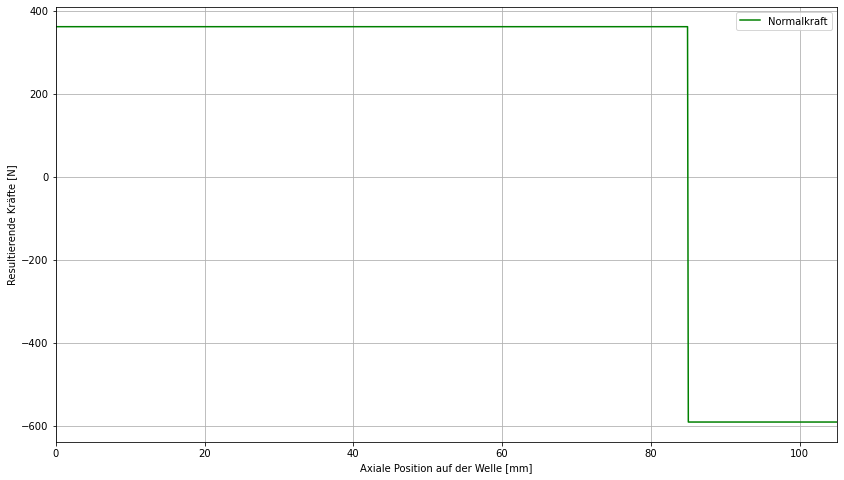

In [58]:
fig1 = plt.figure(figsize=(14,8))

plt.xlim(0,lan2)

x = np.linspace(0,lan2,1000)
y1 = Normal(x)

plt.plot(x,y1,"-g", label="Normalkraft")

# y2 = Q_ges(x)
# plt.plot(x,y2, label="Querkraft")

# plt.title("Normalkraft")
plt.xlabel("Axiale Position auf der Welle [mm]")
plt.ylabel("Resultierende Kräfte [N]")

plt.savefig('Normalkraft.png')
plt.grid()
plt.legend()
plt.show()

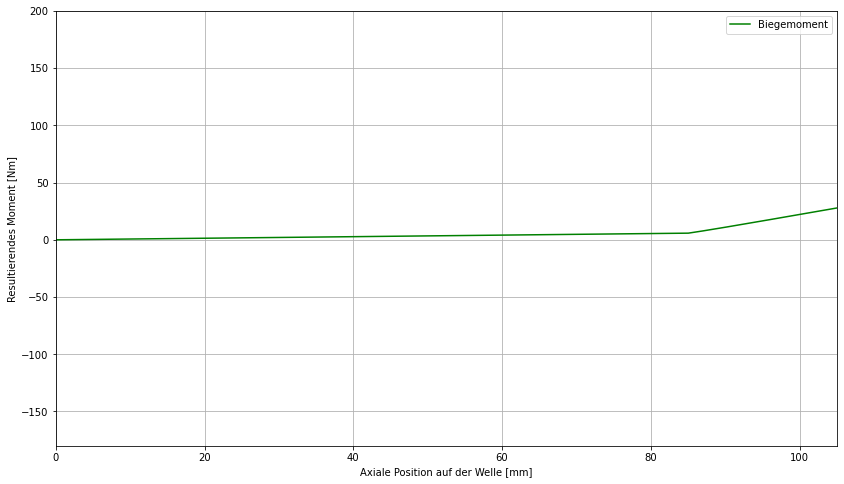

In [59]:
fig2 = plt.figure(figsize=(14,8))

plt.xlim(0,lan2)
plt.ylim(-180, 200)

# y3 = M_t(x)
# plt.plot(x,y3, label="Torsionsmoment")

y4 = Mb_ges(x)
plt.plot(x,y4,"-g", label= "Biegemoment")
plt.xlabel("Axiale Position auf der Welle [mm]")
plt.ylabel("Resultierendes Moment [Nm]")

plt.savefig('biegemoment.png')
plt.grid()
plt.legend()
plt.show()


### Überschlägiger Durchmesser nach Niemann/Winter für Biegung und Torsion graphisch darstellen (Seite 494)

In [60]:
S=5
delta_w=350
delta_zul=delta_w/S

def uber_durchmesser(x):
    y = np.array([])
    for x_value in x:
        if x_value<=lan1:
            Mby=(Az*x_value)
            Mbz=(Ay*x_value)
            Mt = -0.7*M_an*1000
            Mv=math.sqrt((Mby**2 + Mbz**2)+0.4*(Mt**2))
            d_tor=2.17*(Mv/delta_zul)**(1/3)
        else: 
            Mby=Az*x_value+Bz*(x_value-lan1)
            Mbz=Ay*x_value+By*(x_value-lan1)
            Mt = -0.7*M_an*1000
            Mv=math.sqrt((Mby**2 + Mbz**2)+0.4*(Mt**2))
            d_tor=2.17*(Mv/delta_zul)**(1/3)
        y=np.append(y,d_tor) 
    return y

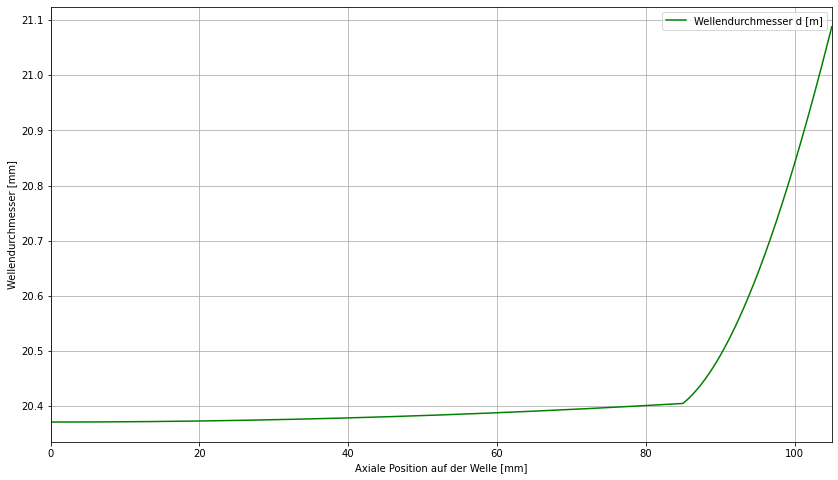

In [61]:
fi3 = plt.figure(figsize=(14,8))

plt.xlim(0,lan2)

x = np.linspace(0,lan2,1000)
y5 = uber_durchmesser(x)

plt.plot(x,y5, "-g", label="Wellendurchmesser d [m]")


plt.xlabel("Axiale Position auf der Welle [mm]")
plt.ylabel("Wellendurchmesser [mm]")

plt.savefig('durchmesser.png')
plt.grid()
plt.legend()
plt.show()

## Genaue Werte für Stelle A, B und C

In [62]:
#Funktionen
def normalkraft(x):
    if x<=lan1:
        N=Ax  
    else:
        N=Ax-Bx
    return N 
    
def biegemoment(x):
    if x<=lan1:
        Mby=(Az*x)
        Mbz=(-Ay*x)
        Mbges=np.sqrt((Mby**2) + (Mbz**2))/1000
    else:
        Mby=Az*x+Bz*(x-lan1)
        Mbz=Ay*x+By*(x-lan1)
        Mbges=np.sqrt((Mby**2) + (Mbz**2))/1000
    
    return Mbges

def querkraft(x):
    if x<=lan1:
        Qy=-Ay
        Qz=-Az
        Qges=np.sqrt(Qy**2 + Qz**2)
    else:
        Qy=-Ay-By
        Qz=-Az-Bz
        Qges=np.sqrt(Qy**2 + Qz**2)
    return Qges

In [79]:
punkte={"A":0, "B":50, "C":65,"D":85, "E":100}

stelle_keys=list(punkte.keys())
stelle_values=list(punkte.values())

print(f'Kräfte an den krititschen Stellen\n')

for i in range(len(punkte)):
    print(f'Der Wert von Normalkraft bei {stelle_keys[i]} ist: {normalkraft(stelle_values[i]):4.4f} N')
    print(f'Der Wert von Biegemoment bei {stelle_keys[i]} ist: {biegemoment(stelle_values[i]):4.4f} Nm')
    print(f'Der Wert von Querkraft bei {stelle_keys[i]} ist: {querkraft(stelle_values[i]):4.4f} N\n')

Kräfte an den krititschen Stellen

Der Wert von Normalkraft bei A ist: 361.2223 N
Der Wert von Biegemoment bei A ist: 0.0000 Nm
Der Wert von Querkraft bei A ist: 68.0177 N

Der Wert von Normalkraft bei B ist: 361.2223 N
Der Wert von Biegemoment bei B ist: 3.4009 Nm
Der Wert von Querkraft bei B ist: 68.0177 N

Der Wert von Normalkraft bei C ist: 361.2223 N
Der Wert von Biegemoment bei C ist: 4.4212 Nm
Der Wert von Querkraft bei C ist: 68.0177 N

Der Wert von Normalkraft bei D ist: 361.2223 N
Der Wert von Biegemoment bei D ist: 2.6527 Nm
Der Wert von Querkraft bei D ist: 68.0177 N

Der Wert von Normalkraft bei E ist: -591.2479 N
Der Wert von Biegemoment bei E ist: 22.1467 Nm
Der Wert von Querkraft bei E ist: 1141.4530 N



In [23]:
# get the image
Image(url="Bilder/uberschlagig_durchmesser1.png", width=2000, height=1000) # Tab 17.1 - S. 494 / Tab 5.6  - S.131  : Beide Niemann 2019

In [76]:
def uberschlag_durchmesser(x):
    if x<=lan1:
        Mby=(Az*x)
        Mbz=(Ay*x)
        Mt = -0.7*M_an*1000
        Mv=math.sqrt((Mby**2 + Mbz**2)+0.4*(Mt**2))
        d_tor=2.17*(Mv/delta_zul)**(1/3)
    else: 
        Mby=Az*x+Bz*(x-lan1)
        Mbz=Ay*x+By*(x-lan1)
        Mt = -0.7*M_an*1000
        Mv=math.sqrt((Mby**2 + Mbz**2)+0.4*(Mt**2))
        d_tor=2.17*(Mv/delta_zul)**(1/3)
    return d_tor

In [80]:
i=85
print(f'Der Wert von überschlägigen Durchmesser bei {i} ist: {uberschlag_durchmesser(i):4.4f} mm')

Der Wert von überschlägigen Durchmesser bei 85 ist: 20.4050 mm
